# Visualize Cross-Prediction Results

In [1]:
import pandas as pd
import numpy as np

%load_ext autoreload
%autoreload 2

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_theme(
    context="paper", 
    style="whitegrid", 
    font_scale=1.2,
    rc={'figure.figsize': (10, 10), 'figure.dpi': 300}
)

## Get Results

In [2]:
from os.path import join

from common.paths import CROSS_PRED_RESULTS
from common.wisc import WISC_LEVEL
import matplotlib.patches as mpatches

In [5]:
fn = 'ridge_pts_age_cross_prediction.csv'
# fn = 'ridge_pts_diagnosis_cross_prediction (n=93).csv'
results_path = join(CROSS_PRED_RESULTS, fn)
df = pd.read_csv(results_path, index_col=0)
display(df)

,Model,Target,Train,Test,Score,P-value,Population,Num Permutations,FDR
0,ridge,WISC_FSIQ,Bin 1,Bin 1,0.250108,0.027944,adhd,500,False
1,ridge,WISC_FSIQ,Bin 1,Bin 2,0.328246,0.001996,adhd,500,True
2,ridge,WISC_FSIQ,Bin 1,Bin 3,0.202752,0.015968,adhd,500,True
3,ridge,WISC_FSIQ,Bin 2,Bin 2,0.348304,0.001996,adhd,500,True
4,ridge,WISC_FSIQ,Bin 2,Bin 3,0.250487,0.003992,adhd,500,True
5,ridge,WISC_FSIQ,Bin 2,Bin 1,0.358564,0.001996,adhd,500,True
6,ridge,WISC_FSIQ,Bin 3,Bin 3,0.031525,0.441118,adhd,500,False
7,ridge,WISC_FSIQ,Bin 3,Bin 1,0.216069,0.015968,adhd,500,True
8,ridge,WISC_FSIQ,Bin 3,Bin 2,0.290556,0.001996,adhd,500,True
9,ridge,WISC_VSI,Bin 1,Bin 1,0.252995,0.009980,adhd,500,True


/home/bpho/.conda/envs/venv/lib/python3.7/site-packages/ipykernel_launcher.py:23: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


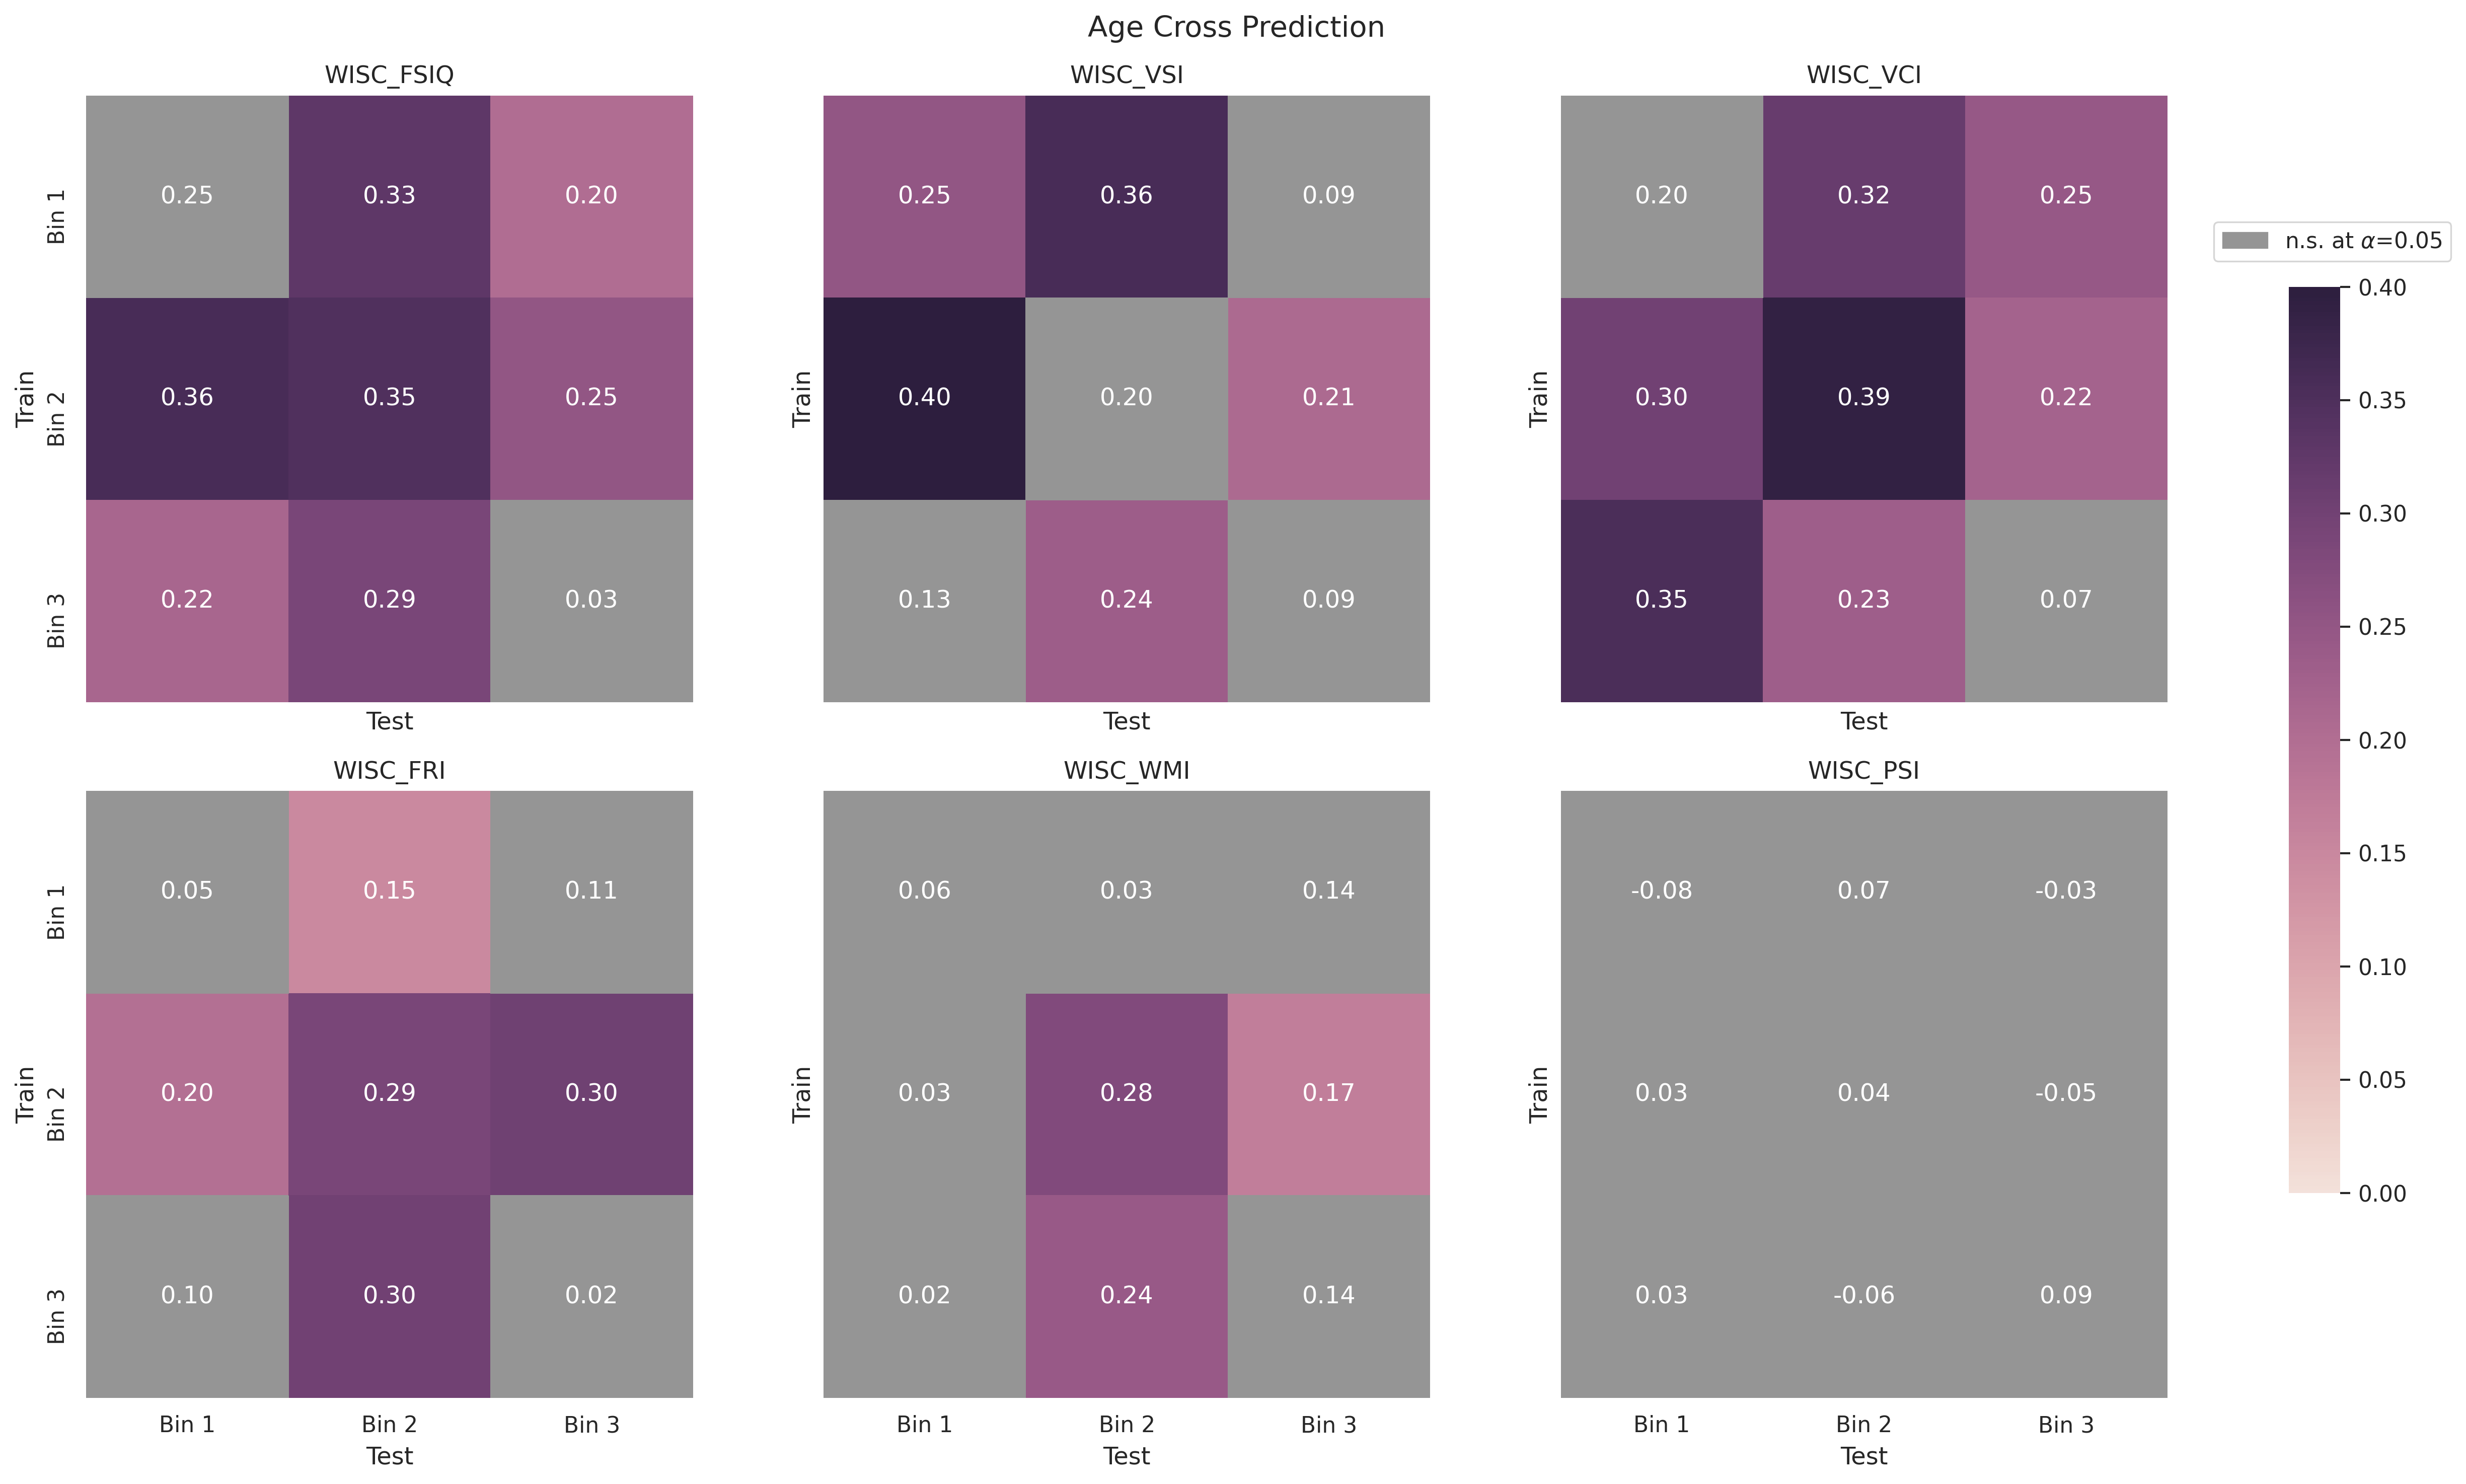

In [7]:
fig, axs = plt.subplots(nrows=2, ncols=3, sharey=True, sharex=True, figsize=(17, 10))
# The dimensions [left, bottom, width, height] of the new Axes. All quantities are in fractions of figure width and height.
cbar_ax = fig.add_axes([.91, .2, .02, .6])
fig.suptitle('Age Cross Prediction')

for idx, measure in enumerate(WISC_LEVEL[5]):
    df_measure = df[df['Target'] == measure]
    scores = df_measure.pivot('Train', 'Test', 'Score')
    fdr = df_measure.pivot('Train', 'Test', 'FDR')
    wisc_axs = axs[idx // 3][idx % 3]
    ax = sns.heatmap(scores, annot=True, fmt=".2f", mask=~fdr, ax=wisc_axs, 
                     cmap=sns.cubehelix_palette(as_cmap=True, light=.9),
                     vmin=0, vmax=0.40, square=True, cbar=(idx == 0), cbar_ax=None if idx else cbar_ax)
    ax = sns.heatmap(scores, annot=True, fmt=".2f", mask=fdr, ax=wisc_axs, cbar=False,
                     cmap=sns.color_palette("Greys", n_colors=1, desat=1), square=True)
    ax.set_title(measure)

colors = [sns.color_palette("Greys", n_colors=1, desat=1)[0]]
texts = [r"n.s. at $\alpha$=0.05"]
patches = [mpatches.Patch(color=colors[i], label="{:s}".format(texts[i]) ) for i in range(len(texts))]
plt.legend(handles=patches, bbox_to_anchor=(.85, 1.05), loc='center')

fig.tight_layout(rect=[0, 0, .9, 1])
plt.show()